In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# https://stackoverflow.com/questions/27161533/find-the-shortest-distance-between-a-point-and-line-segments-not-line

import math

def dot(v,w):
    x,y,z = v
    X,Y,Z = w
    return x*X + y*Y + z*Z

def length(v):
    x,y,z = v
    return math.sqrt(x*x + y*y + z*z)

def vector(b,e):
    x,y,z = b
    X,Y,Z = e
    return (X-x, Y-y, Z-z)

def unit(v):
    x,y,z = v
    mag = length(v)
    return (x/mag, y/mag, z/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y,z = v
    return (x * sc, y * sc, z * sc)

def add(v,w):
    x,y,z = v
    X,Y,Z = w
    return (x+X, y+Y, z+Z)


# Given a line with coordinates 'start' and 'end' and the
# coordinates of a point 'pnt' the proc returns the shortest 
# distance from pnt to the line and the coordinates of the 
# nearest point on the line.
#
# 1  Convert the line segment to a vector ('line_vec').
# 2  Create a vector connecting start to pnt ('pnt_vec').
# 3  Find the length of the line vector ('line_len').
# 4  Convert line_vec to a unit vector ('line_unitvec').
# 5  Scale pnt_vec by line_len ('pnt_vec_scaled').
# 6  Get the dot product of line_unitvec and pnt_vec_scaled ('t').
# 7  Ensure t is in the range 0 to 1.
# 8  Use t to get the nearest location on the line to the end
#    of vector pnt_vec_scaled ('nearest').
# 9  Calculate the distance from nearest to pnt_vec_scaled.
# 10 Translate nearest back to the start/end line. 
# Malcolm Kesson 16 Dec 2012

def pnt2line(pnt, start, end):
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return (dist, nearest)

In [ ]:
# https://stackoverflow.com/questions/27161533/find-the-shortest-distance-between-a-point-and-line-segments-not-line
def point_to_line_dist(point, line):
    """Calculate the distance between a point and a line segment.

    To calculate the closest distance to a line segment, we first need to check
    if the point projects onto the line segment.  If it does, then we calculate
    the orthogonal distance from the point to the line.
    If the point does not project to the line segment, we calculate the 
    distance to both endpoints and take the shortest distance.

    :param point: Numpy array of form [x,y], describing the point.
    :type point: numpy.core.multiarray.ndarray
    :param line: list of endpoint arrays of form [P1, P2]
    :type line: list of numpy.core.multiarray.ndarray
    :return: The minimum distance to a point.
    :rtype: float
    """
    # unit vector
    unit_line = line[1] - line[0]
    norm_unit_line = unit_line / np.linalg.norm(unit_line)

    # compute the perpendicular distance to the theoretical infinite line
    segment_dist = (
        np.linalg.norm(np.cross(line[1] - line[0], line[0] - point)) /
        np.linalg.norm(unit_line)
    )

    diff = (
        (norm_unit_line[0] * (point[0] - line[0][0])) + 
        (norm_unit_line[1] * (point[1] - line[0][1]))
    )

    x_seg = (norm_unit_line[0] * diff) + line[0][0]
    y_seg = (norm_unit_line[1] * diff) + line[0][1]

    endpoint_dist = min(
        np.linalg.norm(line[0] - point),
        np.linalg.norm(line[1] - point)
    )

    # decide if the intersection point falls on the line segment
    lp1_x = line[0][0]  # line point 1 x
    lp1_y = line[0][1]  # line point 1 y
    lp2_x = line[1][0]  # line point 2 x
    lp2_y = line[1][1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    if is_betw_x and is_betw_y:
        return segment_dist
    else:
        # if not, then return the minimum distance to the segment endpoints
        return endpoint_dist

# Plotting a Quiver Plot
This is some code that does shit, stolen from [here](https://stackoverflow.com/questions/26834173/how-do-i-generate-a-vector-field-plot-for-logistic-equation-k-1-using-matplotl).

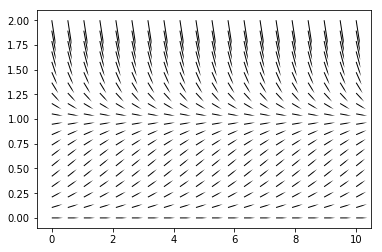

In [8]:
demo_x = np.linspace(0, 10,  20)
demo_y = np.linspace(0 ,2, 20)
demo_X, demo_Y = np.meshgrid(demo_x, demo_y)   # make a grid that roughly matches the Strogatz grid  

demo_dydx = demo_Y*(1-demo_Y)            # the equation of interest
demo_dx = .5*np.ones(demo_Y.shape)  # a constant value (.5 is just so segments don't run into each other -- given spacing of times array
demo_dy = demo_dydx * demo_dx           # given dt, now calc dx for the line segment

plt.quiver(demo_X, demo_Y, demo_dx, demo_dy, headwidth=1, angles='xy', scale=15.)
plt.show()

# Developing the Mission Profile
We want a vector field for the uuv to travel in straight lines between waypoints.

The entire path will be generated at once.

A seperate vector field will be calculated for each waypoint.

## Geometry Setup
Global origin is in the bottom left corner (no negative coordinates).

In [42]:
# define the world grid
x_spacing = 1
y_spacing = 1
max_x = 10
max_y = 10

world_x = np.linspace(1,max_x,max_x*x_spacing)
world_y = np.linspace(1,max_y,max_y*y_spacing)
world_X, world_Y = np.meshgrid(world_x, world_y)

In [17]:
waypoints = [(2,1),(2,9),(4,9),(4,1)]  # define the waypoints

In [ ]:
def get_steering_vector(curr_x,curr_y,start_point,end_point):
    

In [ ]:
for current_waypoint_index in range(0,len(waypoints)-2):
    start_point = waypoints[current_waypoint_index]
    end_point = waypoints[current_waypoint_index+1]
    
    

In [43]:
# test basic pathfinding
start_point = (2,1)
end_point = (2,9)
path_dx = end_point[0] - start_point[0]
path_dy = end_point[1] - start_point[1]

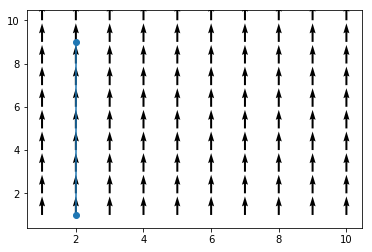

In [44]:
# plot it!
fig, ax = plt.subplots()
ax.quiver(world_X, world_Y, path_dx, path_dy)
ax.scatter([start_point[0], end_point[0]],[start_point[1],end_point[1]])
ax.plot([start_point[0], end_point[0]],[start_point[1],end_point[1]])
plt.show()

In [41]:
pnt2line([6,4.6,0],(2,1,0),(3,6,0))[0]

3.216304616266218